 # Opis notatnika
 Ten notatnik jest kontunacją analizy danych o lotach i ich opóźnieniach. Od tego momentu zaczniemy łączyć posiadana przez nas zbiory danych, będąc w stanie dokonać dodatkowych analiz.

 Zanim jednak do tego przejdziemy, należy, podobnie jak w poprzednim kroku, skonfigurować odpowiednio notatnik.
 
 W tej części warsztatu ponownie wcielasz się w rolę Analiyka Danych, którego zadaniem jest wykonanie analizy eksplotacyjnej zbioru danych - jedno z wymagań dostarczonych przez klienta.

 Tutaj zaimportuj wymagane biblioteki

In [39]:
import mysql.connector as sql
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [40]:
username = 'postgres'
password = '9292'

host = 'localhost'
database = 'airlines'
port = 5432

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [41]:
url = f"postgresql://{username}:{password}@{host}:{port}/{database}"
engine = sqlalchemy.create_engine(url)

 Tutaj uzupełnij implementację metody `read_sql_table`

In [42]:
def read_sql_table(table):
    df = pd.read_sql(f"SELECT * FROM {table}", url)
    return df

 Tutaj zaczytaj zapisaną wcześniej ramkę danych `flight_df` do zmniennej o takiej samej nazwie

In [43]:
flight_df = pd.read_csv("C:/Users/User/OneDrive - AEI/Pulpit/Pliki_do_Portfolio_Lab/data/raw/flight_df_01.csv")
flight_df 

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,dep_time_blk,crs_arr_time,arr_time,arr_delay_new,arr_time_blk,cancelled,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg
0,1,1,20,7,WN,N204WN,682,10397,11292,605,602.0,0.0,0600-0659,730,726.0,0.0,0700-0759,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,0.0,2100-2159,2250,2239.0,0.0,2200-2259,0.0,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,7.0,1800-1859,1930,1947.0,17.0,1900-1959,0.0,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100-1199
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,0.0,1300-1359,1520,1518.0,0.0,1500-1559,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,0.0,1100-1159,1325,1329.0,4.0,1300-1359,0.0,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,True,500-599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,1822.0,15.0,1800-1859,2008,2016.0,8.0,2000-2059,0.0,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,2022.0,23.0,1900-1959,2256,2320.0,24.0,2200-2259,0.0,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019,True,False,1000-1099
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,1122.0,0.0,1100-1159,1323,1259.0,0.0,1300-1359,0.0,118.0,97.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,500-599
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,750.0,50.0,0700-0759,1000,1106.0,66.0,1000-1059,0.0,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019,True,False,1000-1099


Sprawdzenie poprawności danych w ramce `flight_df` 

In [44]:
flight_df_expected_rows_amount = 1057391
flight_df_rows_amount = flight_df.shape[0]

assert flight_df_rows_amount == flight_df_expected_rows_amount, f'Oczekiwano {flight_df_expected_rows_amount} wierszy, otrzymano {flight_df_rows_amount}'

 # Wzbogacenie o `aircraft`
 Używając procedury `read_sql_table` wczytaj dane z tabeli `aircraft` i zapisz jako `aircraft_df`. Następnie:  
 1. Usuń z ramki kolumny `number_of_seats` oraz `id`. Na tej podstawie usuń nadmiarowe wiersze (duplikaty).  
 1. Następnie jeszcze raz sprawdź, czy dla kolumny `tail_num` nie występują duplikaty. Innymi słowy należy sprawdzić, czy dla jednego `tail_num` występuje więcej niż jeden rok produkcji.  
 1. Jeśli tak to:  
     - do ramki `aircraft_df_duplicated` zapisz powielone zgodnie ze sprawdzeniem wiersze,  
     - zgodnie z powyższym zmodyfikuj ramkę tak, aby w przypadku duplikatu za datę wytworzenia samolotu, uznana została najnowsza tj. jeśli dla `tail_num` są dostępne daty produkcji 1998 oraz 2001, uznajemy, że `tail_num` został wyprodukowany w `2001`.

 Wskazówki:
 - Praca z duplikatami na LMS: `Python - analiza danych -> Dzień 5 - Pandas -> Duplikaty`
 - Dokumentacja metody `duplicated`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)
 - Dokumentacja metody `drop_duplicates`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

 Tutaj wczytaj tabelę `aircraft` używając `read_sql_table`

In [45]:
aircraft_df = read_sql_table('aircraft')
aircraft_df

,id,manufacture_year,tail_num,number_of_seats
0,1,1944,N54514,0.0
1,2,1945,N1651M,0.0
2,3,1953,N100CE,0.0
3,4,1953,N141FL,0.0
4,5,1953,N151FL,0.0
...,...,...,...,...
7378,7379,2019,N14011,337.0
7379,7380,2019,N16008,337.0
7380,7381,2019,N16009,337.0
7381,7382,2019,N2250U,276.0


 Tutaj usuń kolumny `number_of_seats`, `id` oraz duplikaty z ramki `aircraft_df`

In [46]:
# Usuwanie kolumn
aircraft_df.drop(columns=['number_of_seats', 'id'], inplace=True)

# Usuwanie duplikatów
aircraft_df.drop_duplicates(inplace=True)

aircraft_df

,manufacture_year,tail_num
0,1944,N54514
1,1945,N1651M
2,1953,N100CE
3,1953,N141FL
4,1953,N151FL
...,...,...
7378,2019,N14011
7379,2019,N16008
7380,2019,N16009
7381,2019,N2250U


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [47]:
aircraft_df_expected_rows = 7364
aircraft_df_expected_columns = set(['tail_num', 'manufacture_year'])

aircraft_df_rows = aircraft_df.shape[0]

diff = aircraft_df_expected_columns.symmetric_difference(set(aircraft_df.columns))
assert aircraft_df_rows == aircraft_df_expected_rows, f'Spodziewano się {aircraft_df_expected_rows} wierszy , otrzymano {aircraft_df_rows} wierszy'

assert diff == set([]), f'Spodziewano się {aircraft_df_expected_columns} kolumn, otrzymano: {aircraft_df_expected_columns} kolumn. Różnica: \n\t{diff}'

 Tutaj sprawdź czy w ramkce `aircraft_df` występują duplikaty wewnątrz kolumny `tail_num`. Czyli czy dla danego `tail_num` występuje więcej niż jeden rok produkcji.

In [48]:
aircraft_df_is_duplicated = aircraft_df.duplicated(subset='tail_num')
aircraft_df_duplicated = aircraft_df.loc[aircraft_df_is_duplicated]

 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić czy ta część została poprawnie wykonana

In [49]:
aircraft_df_expected_rows = 3
aircraft_df_duplicated_rows = aircraft_df_duplicated.shape[0]
assert aircraft_df_duplicated_rows == aircraft_df_expected_rows, f"Oczekiwano {aircraft_df_expected_rows} wierszy, otrzymano {aircraft_df_duplicated_rows}"

 ## Modyfikacja `aircraft_df`
 Tutaj dokonaj aktualizacji tabeli `aircraft_df` - jeśli jest taka potrzeba. Zrób to tak aby, dla powielonych `tail_num`, `manufacture_year` został ustawiony jako najwyższy

In [50]:
aircraft_df['tail_num'].duplicated().any().sum()

1

In [51]:
aircraft_df[aircraft_df['tail_num'].duplicated()]

,manufacture_year,tail_num
2086,2000,N783CA
5725,2014,N856GT
6746,2017,N877AS


In [52]:
# Sortowanie tabeli
aircraft_df.sort_values(by=['tail_num', 'manufacture_year'], ascending=False, inplace=True)

# Usuwanie duplikatów
aircraft_df.drop_duplicates(subset=['tail_num'], keep='first', inplace=True)

aircraft_df

,manufacture_year,tail_num
53,1974,ZS-RSG
54,1974,ZS-RSF
48,1972,ZS-RSC
73,1978,ZS-OPS
67,1976,ZS-JIV
...,...,...
203,1987,CFEXI
179,1987,CFEXH
1143,1996,CFEXF
1152,1996,CFEXB


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [53]:
test_tail = 'N783CA'
test_value = aircraft_df.loc[aircraft_df['tail_num']
                             == test_tail]['manufacture_year']
test_value = int(test_value)

expected_value = 2000
assert test_value == expected_value, f"Dla 'tail_num' == '{test_tail}' oczekiwano {expected_value} otrzymano {test_value}"

C:\Users\User\AppData\Local\Temp\ipykernel_4520\1562451788.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_value = int(test_value)


 ## Połączenie `aircraft_df` oraz `flight_df`
 Połącz ramkę `aircraft_df` oraz `flight_df` zgodnie z kluczem oraz odpowiedz na następujące pytania:
 1. Czy po połączeniu pojawiły się duplikaty? Dokonaj odpowiedniego sprawdzenia.
 1. Wyznacz zależność roku produkcji do częstotliwości opóźnień. Wynik zapisz do tabeli `delays_by_manufacture_year_df`.
 1. Przedstaw wyniki w tabeli za pomocą wykresu punktowego.
 1. Dokonaj modyfikacji w taki sposób, aby wyświetlone na wykresie zostały tylko takie roczniki samolotów, które wykonały łącznie więcej niż 10000 `(>)` lotów.

> **Wskazówka:**
> Aby nie utracić potencjalnie całej dotychczasowej pracy, zapisz wynik do tymczasowej zmiennej np. `tmp_flight_df`. Po sprawdzeniu możesz użyć metody `copy`: [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html), aby nadpisać `flight_df` używając `tmp_flight_df`.

 Tutaj dokonaj złączenia `flight_df` z `aircraft_df`, wynik zapisz do `tmp_flight_df`

In [54]:
# Połączenie ramki danych
tmp_flight_df = pd.merge(flight_df, aircraft_df, on='tail_num', how='left')

 Tutaj dokonaj sprawdzenia, czy nie pojawiły się duplikaty

In [55]:
# Sprawdzenie, czy istnieją duplikaty w kolumnie 'tail_num'
duplicates_exist = tmp_flight_df['tail_num'].duplicated().any()
duplicates_exist

True

 Tutaj nadpisz `flight_df` używając `tmp_flight_df`

In [56]:
flight_df = tmp_flight_df.copy()

 ## Opóźnienia vs. rok produkcji samolotu cz. 1
 Tutaj wyznacz zależność roku produkcji do częstotliwości opóźnień

In [57]:
# Obliczenie średniej częstotliwości opóźnień dla każdego roku produkcji
delays_by_manufacture_year_df = flight_df.groupby('manufacture_year')['is_delayed'].mean()

 Tutaj wyrysuj ramkę `delays_by_manufacture_year_df`

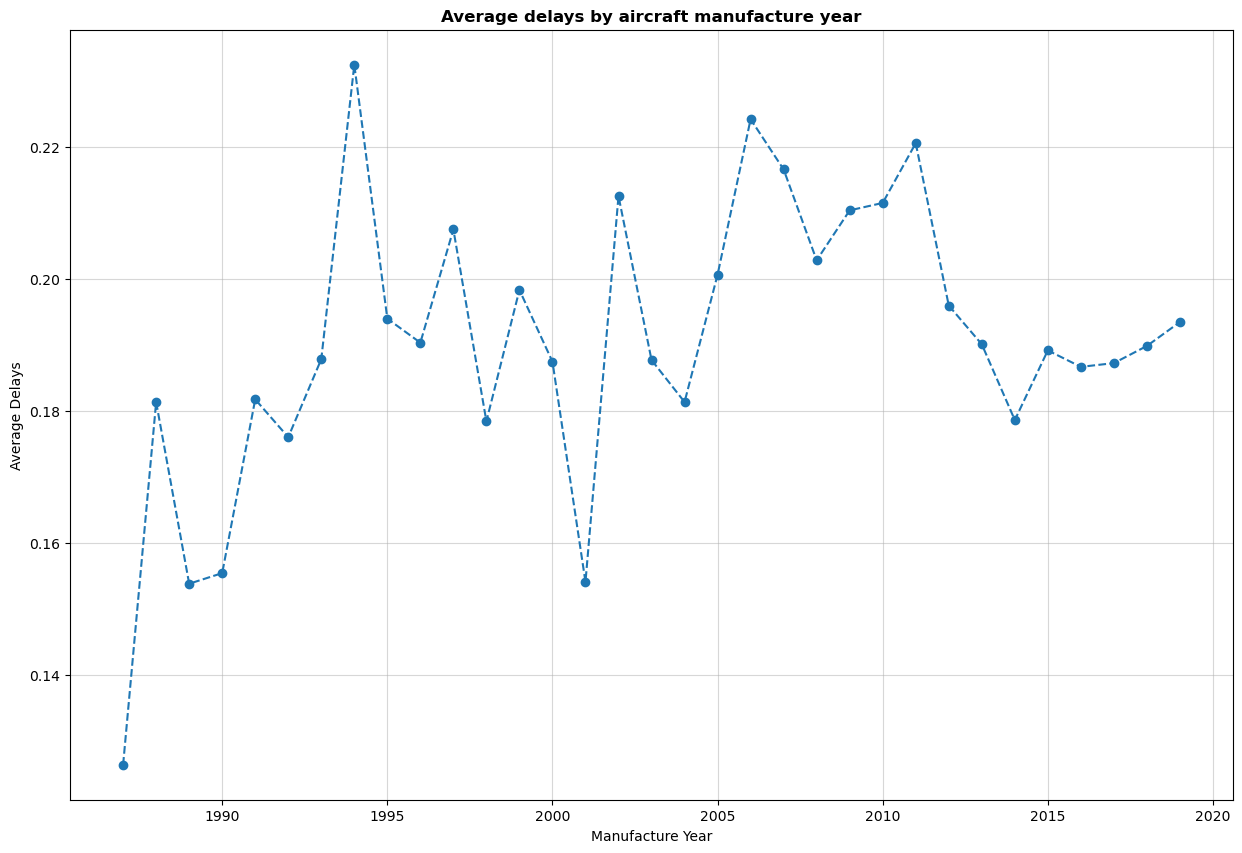

In [58]:
#Generowanie wykresu
plt.figure(figsize=(15, 10))
plt.plot(delays_by_manufacture_year_df.index, delays_by_manufacture_year_df.values, marker = 'o', linestyle='--')
plt.title('Average delays by aircraft manufacture year', fontweight='bold')
plt.xlabel('Manufacture Year')
plt.ylabel('Average Delays')
plt.grid(alpha=0.5)
plt.show()

 Tutaj zmodyfikuj wykres tak, aby prezentował tylko te roczniki, które odbyły więcej niż 10000 lotów

In [59]:
#filtracja
flights_per_year = flight_df['manufacture_year'].value_counts()
flights_per_year

manufacture_year
2001.0    100251
2016.0     66191
2017.0     62353
2014.0     61128
2015.0     58426
2000.0     58215
2008.0     48558
2018.0     47370
2006.0     44952
1999.0     44018
2004.0     43266
2005.0     41621
2013.0     40543
1998.0     40317
2007.0     37804
2002.0     35845
2012.0     32728
2009.0     26278
2011.0     23084
2019.0     22918
2003.0     21081
2010.0     20977
1992.0     13882
1996.0     12186
1997.0      9121
1995.0      7731
1991.0      7701
1993.0      5562
1994.0      5191
1990.0      4786
1988.0       634
1987.0       443
1989.0        13
Name: count, dtype: int64

In [60]:
years_over_10000_flights = flights_per_year[flights_per_year > 10000].index
years_over_10000_flights 
filtered_flight_df = flight_df[flight_df['manufacture_year'].isin(years_over_10000_flights)]

#Grupowanie - zależność roku produkcji do częstotliwości opóźnień
filtered_delays_by_manufacture_year_df = filtered_flight_df.groupby('manufacture_year')['is_delayed'].mean()

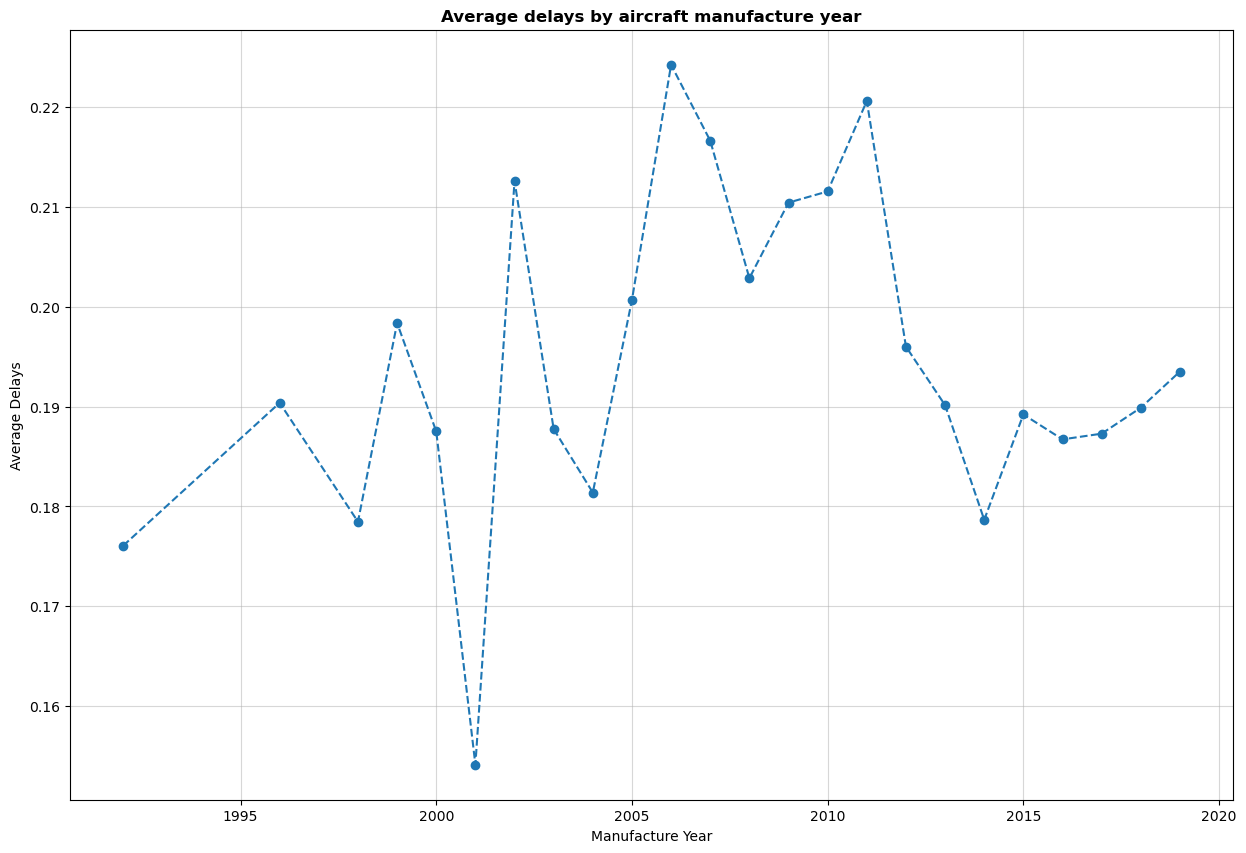

In [61]:
#Generowanie wykresu
plt.figure(figsize=(15, 10))
plt.plot(filtered_delays_by_manufacture_year_df.index, filtered_delays_by_manufacture_year_df.values, marker='o', linestyle='--')
plt.title('Average delays by aircraft manufacture year', fontweight='bold')
plt.xlabel('Manufacture Year')
plt.ylabel('Average Delays')
plt.grid(alpha=0.5)
plt.show()

 ## Opóźnienia vs. rok produkcji samolotu cz. 2
 Dokonaj agregacji kolumny `manufacture_year` do kolumny `manufacture_year_agg` zgodnie z poniższym:
 1. Grupując dane co 3 lata -> Czy po grupowaniu można zauważyć zależność? Wyniki zapisz do ramki `flight_delays_by_manufacture_year_agg_df`.
 1. Wyznacz top 5 roczników samolotu, które wykonały najwięcej lotów. Wyniki zapisz do ramki `top_manufactured_df`, do obliczeń wykorzystaj `delays_by_manufacture_year_df`.

 Tutaj dodaj kolumnę `manufacture_year_agg` do ramki `flight_df`

In [67]:
# Definiowanie przedziałów co 3 lata
bins = list(range(int(flight_df['manufacture_year'].min()), int(flight_df['manufacture_year'].max()) + 4, 3))

# Tworzenie etykiet przedziałów
labels = [f"{bins[i]}-{bins[i]+2}" for i in range(len(bins)-1)]

# Dodawanie kolumny `manufacture_year_agg` z niestandardowymi etykietami przedziałów
flight_df['manufacture_year_agg'] = pd.cut(flight_df['manufacture_year'], bins=bins, labels=labels, right=False)

# Wyświetlenie wyników
flight_df.head(5)

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,dep_time_blk,crs_arr_time,arr_time,arr_delay_new,arr_time_blk,cancelled,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg
0,1,1,20,7,WN,N204WN,682,10397,11292,605,602.0,0.0,0600-0659,730,726.0,0.0,0700-0759,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2005.0,2005-2007
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,2114.0,0.0,2100-2159,2250,2239.0,0.0,2200-2259,0.0,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,2016.0,2014-2016
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,1807.0,7.0,1800-1859,1930,1947.0,17.0,1900-1959,0.0,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100-1199,1998.0,1996-1998
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,1354.0,0.0,1300-1359,1520,1518.0,0.0,1500-1559,0.0,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100-1199,1998.0,1996-1998
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,1125.0,0.0,1100-1159,1325,1329.0,4.0,1300-1359,0.0,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,True,500-599,2001.0,1999-2001


 Tutaj stwórz zmienną `flight_delays_by_manufacture_year_agg_df`

In [68]:
# Obliczenie średnich opóźnień po agregacji kolumny manufacture_year_agg
flight_delays_by_manufacture_year_agg_df = flight_df.groupby('manufacture_year_agg')['is_delayed'].mean().reset_index()
flight_delays_by_manufacture_year_agg_df

,manufacture_year_agg,is_delayed
0,1987-1989,0.158716
1,1990-1992,0.173992
2,1993-1995,0.202986
3,1996-1998,0.185123
4,1999-2001,0.173337
5,2002-2004,0.193898
6,2005-2007,0.214059
7,2008-2010,0.206851
8,2011-2013,0.199440
9,2014-2016,0.184850


 Tutaj stwórz wykres w oparciu o dane zawarte w `flight_delays_by_manufacture_year_agg_df`

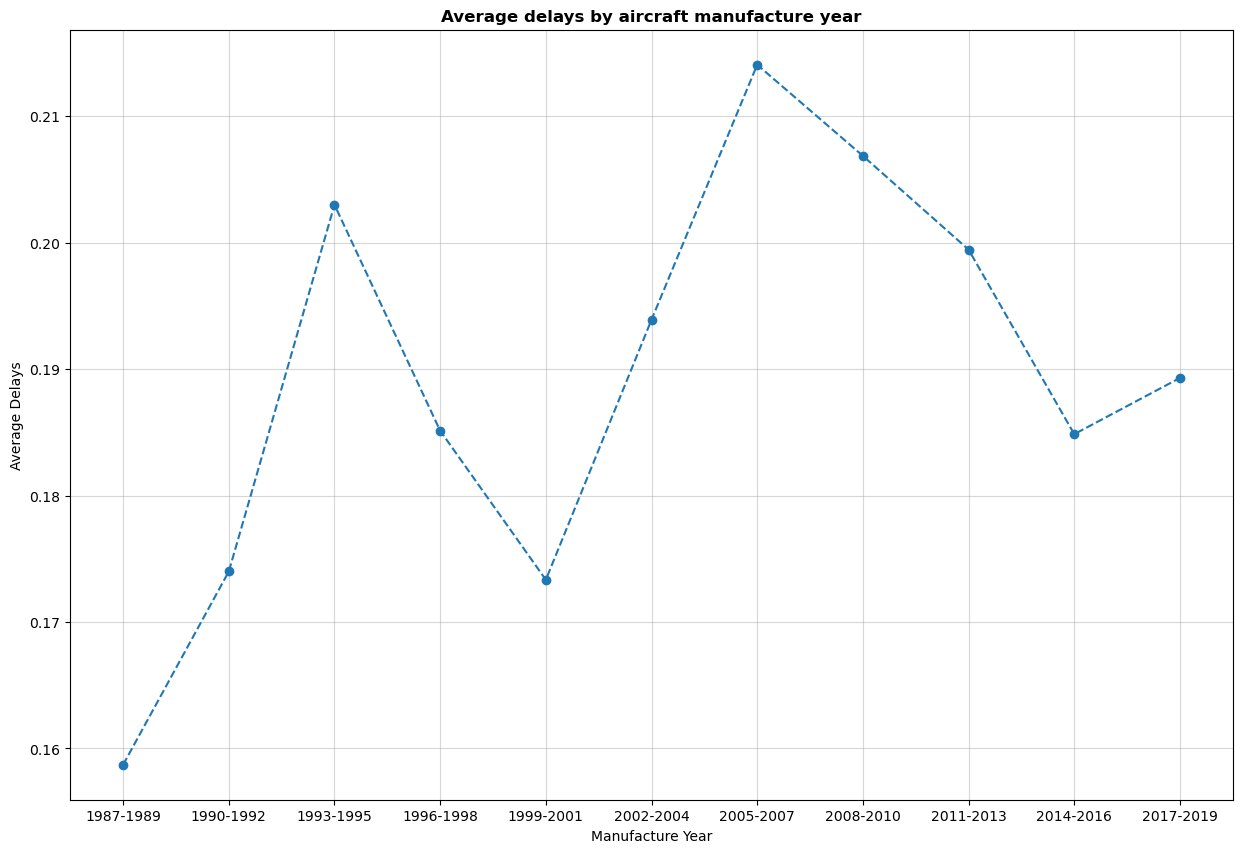

In [69]:
#Generowanie wykresu
plt.figure(figsize=(15, 10))
plt.plot(flight_delays_by_manufacture_year_agg_df['manufacture_year_agg'], flight_delays_by_manufacture_year_agg_df['is_delayed'], marker='o', linestyle='--')
plt.title('Average delays by aircraft manufacture year', fontweight='bold')
plt.xlabel('Manufacture Year')
plt.ylabel('Average Delays')
plt.grid(alpha=0.5)
plt.show()

Tutaj wyznacz TOP 5 roczników produkcji - czyli sortując według liczby wykonanych lotów, pamiętaj o wyświetleniu również wartości opóźnienia.

In [70]:
# Grupowanie 
manufacture_year_stats = flight_df.groupby('manufacture_year').agg(num_flights=('tail_num', 'count'), mean_delay=('is_delayed', 'mean'))
# Sortowanie według liczby lotów w malejącej kolejności
manufacture_year_top5 = manufacture_year_stats.sort_values(by='num_flights', ascending=False).head()
manufacture_year_top5

,num_flights,mean_delay
manufacture_year,,
2001.0,100251,0.154113
2016.0,66191,0.186717
2017.0,62353,0.187289
2014.0,61128,0.178658
2015.0,58426,0.189214


 # Podsumowanie
 W tym notatniku do naszej wyjściowej ramki danych `flight_df` dołączyliśmy tabelę `aircraft_df` i za jej pomocą dodaliśmy kolejny wymiar do naszej analizy. Zauważmy, ile dodatkowych wniosków mogliśmy wyciągnąć dzięki jej dodaniu.

 Zanim przejdziemy dalej, należy zapisać bieżącą postać ramki (najlepiej lokalnie), która zostanie użyta w kolejnym notatniku.

 > **Wskazówka:**  
 > Aby uniknąć potencjalnych problemów, najlepiej zapisać ramkę z nazwą nawiązującą do tego notatnika, np. `flight_df_01`.

 Tutaj zapisz ramkę w najdogodniejszy sposób

In [72]:
# Zapisz ramkę danych do pliku CSV
flight_df.to_csv("C:/Users/User/OneDrive - AEI/Pulpit/Pliki_do_Portfolio_Lab/data/raw/flight_df_02.csv", index=False)

print("Ramka danych została zapisana jako 'flight_df_02.csv'.")

Ramka danych została zapisana jako 'flight_df_02.csv'.
